# Investigate The 'tmdb-movies' Dataset 

**Welcome** to the Investigate 'tmdb-movies' Dataset project! the project investigates the dataset through several steps. <br>
The project starts with an overview as an introduction of the dataset. Then, showing the clean of the data generally. After that, analyzing some aspects of the data beginning with select the specific related data, explore it and ending with visualizing the findings.<br>
**Lets** start the journey!

## Table of Contents
<ul>
<li><a href="#over">Introduction | Data Overview</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#que1">1. Movie Genres</a></li>
<li><a href="#que2">2. Director</a></li>
<li><a href="#que3">3. Release Year</a></li>
<li><a href="#que4">4. Production Companies</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [143]:
# import needed pckg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb-movies.csv')

<a id='over'></a>
## Data Overview

In this section, it will be displaying an overview of the dataset such as some samples of data in the data frame, the number of rows and columns, datatypes of variables, the data frame is contains duplicated rows? Or is includes missing values? And it shows describing some statistic.

In [144]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>There are multi values in **'cast', 'genres' and 'production_companies'** columns!

In [145]:
df.shape

(10866, 21)

In [146]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>the **'release_date'** column is obj type, not date! >> need to rechange it

In [147]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Huge of missing data on **'homepage'** column! 

In [148]:
df.duplicated().sum()

1

>there is a duplicated row.. we need to drop it

In [149]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='clean'></a>
## Clean Data

In this section, it will be displaying some of cleaning data techniques that applied to the data frame, generally, beginning with removing the duplicated rows, then, changing the release date from int to date type.

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
# check
df.duplicated().sum()

0

In [152]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

In [153]:
#check
df['release_date'].dtypes

dtype('<M8[ns]')

<a id='que1'></a>
## Movie Genres 

In this section, we will take a tour to get the answers to questions about the **movies genres**.<br>
The section starts with selecting the related data needed to build a subset data frame related to movies genres.<br>
Then, exploring the relationship between the movies genres and these data will lead to getting the answers. <br>
Additionally, will represent visualizing some question's result in appropriate charts.

### Select the related data

In [154]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [155]:
df_genres = df[['budget','revenue', 'original_title', 'genres','release_year', 'vote_average']]

# check
df_genres.shape[0] == df.shape[0]

True

### Explore 

In [156]:
df_genres = df_genres.assign(genres=df['genres'].str.split('|')).explode('genres')

In [157]:
df_genres.head()

,budget,revenue,original_title,genres,release_year,vote_average
0,150000000,1513528810,Jurassic World,Action,2015,6.5
0,150000000,1513528810,Jurassic World,Adventure,2015,6.5
0,150000000,1513528810,Jurassic World,Science Fiction,2015,6.5
0,150000000,1513528810,Jurassic World,Thriller,2015,6.5
1,150000000,378436354,Mad Max: Fury Road,Action,2015,7.1


In [158]:
df_genres.genres.unique() 

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

>need to drop nan val

In [159]:
df_genres.dropna(subset=['genres'], inplace = True)

#check
df_genres.genres.isnull().sum()

0

In [160]:
# best movie in each genres depend on voting, 
best_gen = df_genres[['genres', 'original_title', 'vote_average']]
best_gen.head()

,genres,original_title,vote_average
0,Action,Jurassic World,6.5
0,Adventure,Jurassic World,6.5
0,Science Fiction,Jurassic World,6.5
0,Thriller,Jurassic World,6.5
1,Action,Mad Max: Fury Road,7.1


In [161]:
best_gen.groupby('genres')[['original_title','vote_average']].max()

,original_title,vote_average
genres,,
Action,í˜•ì‚¬ Duelist,8.1
Adventure,æ±äº¬æ®‹é…·è­¦å¯Ÿ,8.5
Animation,ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰,8.3
Comedy,ìž‘ì—…ì˜ ì •ì„,8.5
Crime,ì‹ ì˜ í•œ ìˆ˜,8.4
Documentary,æˆé¾çš„ç‰¹æŠ€,9.2
Drama,ì‹ ì˜ í•œ ìˆ˜,8.8
Family,iCarly: iGo to Japan,8.0
Fantasy,Zoom,8.4


In [162]:
# which genres is most freq?
df_genres.genres.describe()

count     26955
unique       20
top       Drama
freq       4760
Name: genres, dtype: object

In [163]:
# top 10
genres_bud = df_genres.groupby('genres').budget.sum().nlargest(10)
genres_bud

genres
Action             66103123670
Drama              56552216602
Adventure          55226774655
Comedy             50438993940
Thriller           50022765787
Science Fiction    30691424364
Fantasy            29873128179
Family             28755344365
Crime              23916786723
Romance            21453537403
Name: budget, dtype: int64

> The Action movies consume the higher bud!!

In [164]:
#top 10
genres_rev = df_genres.groupby('genres').revenue.sum().nlargest(10)
genres_rev

genres
Action             173542641094
Adventure          166425793633
Comedy             142337036180
Drama              139145537255
Thriller           121304509800
Family              89165240116
Fantasy             88223309887
Science Fiction     86202745824
Romance             61104656624
Crime               57367167868
Name: revenue, dtype: int64

> The Action movies achives the largest rev! Great!!

In [165]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [166]:
# list with movie genres have a higher voting 
df_genres.groupby('genres').vote_average.max().sort_values(ascending = False)

genres
Documentary        9.2
Drama              8.8
Thriller           8.8
Science Fiction    8.8
Mystery            8.8
Horror             8.8
Music              8.7
Comedy             8.5
Adventure          8.5
Romance            8.4
Crime              8.4
Fantasy            8.4
Animation          8.3
Action             8.1
War                8.1
History            8.1
Family             8.0
TV Movie           7.9
Foreign            7.8
Western            7.7
Name: vote_average, dtype: float64

In [167]:
# top movie genres production 
genres_freq = df_genres.genres.value_counts()
genres_freq

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

### Visual 

<AxesSubplot:ylabel='genres'>

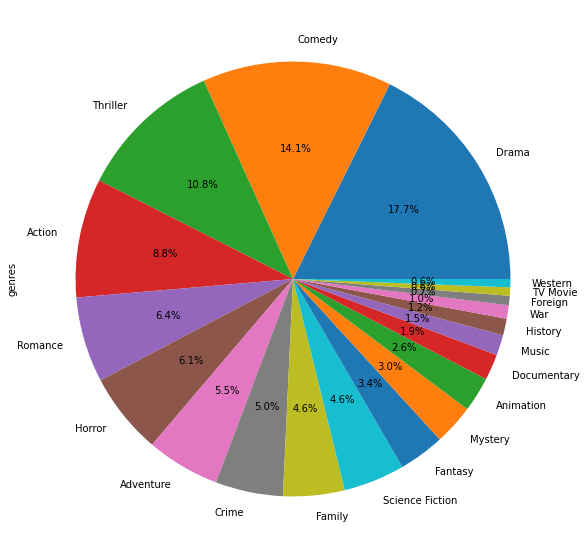

In [168]:
#movies genres produced 
genres_freq.plot(kind = 'pie', autopct='%1.1f%%', figsize=(20, 10))

> The Drama movies are most  produced.

Text(0, 0.5, 'Budget')

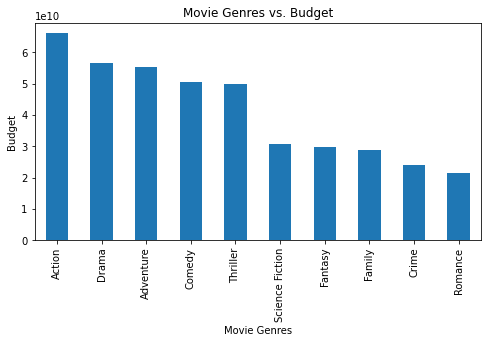

In [169]:
# the total budget spent depend on movie genres
genres_bud.plot(kind = 'bar', figsize=(8,4))
plt.title('Movie Genres vs. Budget')
plt.xlabel('Movie Genres')
plt.ylabel('Budget')

Text(0, 0.5, 'Revenue')

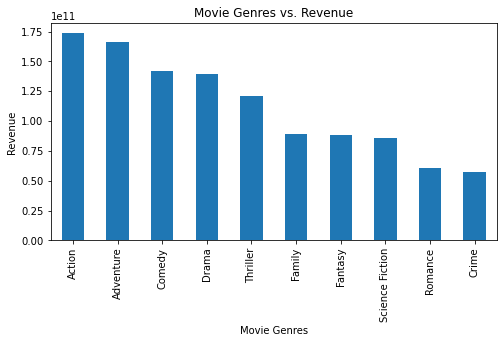

In [170]:
# the total revenue gains depend on movie genres
genres_rev.plot(kind = 'bar', figsize=(8,4))
plt.title('Movie Genres vs. Revenue')
plt.xlabel('Movie Genres')
plt.ylabel('Revenue')

<a id='que2'></a>
## Director

In this section, we will take a tour to get the answers to questions about the **Director**.<br>
The section starts with selecting the related data needed to build a subset data frame related to the director. <br>
Then, exploring the relationship between the director and these data will lead to getting the answers. <br>
Additionally, will represent visualizing some question's result in appropriate charts.

### Select the related data

In [171]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [172]:
df_director = df[['budget', 'revenue', 'original_title','director','vote_average', 'release_year']]

### Explore

In [173]:
df_director.head()

,budget,revenue,original_title,director,vote_average,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,7.1,2015
2,110000000,295238201,Insurgent,Robert Schwentke,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,7.5,2015
4,190000000,1506249360,Furious 7,James Wan,7.3,2015


In [174]:
df_director.isnull().sum()

budget             0
revenue            0
original_title     0
director          44
vote_average       0
release_year       0
dtype: int64

In [175]:
df_director.dropna(subset= ['director'], inplace = True)
# check
df_director.director.isnull().sum()

F:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [176]:
# num of directors in the ds
df_director.director.nunique()

5067

In [177]:
df_director.director.describe()

count           10821
unique           5067
top       Woody Allen
freq               45
Name: director, dtype: object

In [178]:
# lets check on the voting of his movies
df_director.query('director == "Woody Allen"').vote_average.mean() 

6.444444444444443

In [179]:
# ok, lets check on the average voting 
df_director.vote_average.mean()

5.97150910267075

> it appears to us the **Woody Allen** did good work !

In [180]:
#lets to explore what years begin (duariton work)
df_director.query('director == "Woody Allen"').release_year.value_counts()

1987    2
1983    1
1995    1
2003    1
2002    1
2001    1
2000    1
1999    1
1998    1
1997    1
1996    1
1994    1
1982    1
1993    1
1992    1
1991    1
1990    1
1989    1
1988    1
1986    1
1985    1
2004    1
2005    1
2006    1
1969    1
1980    1
1979    1
1978    1
1977    1
1975    1
1973    1
1972    1
1971    1
1966    1
2007    1
2015    1
2014    1
2013    1
2012    1
2011    1
2010    1
2009    1
2008    1
1984    1
Name: release_year, dtype: int64

> he appears focused man >> one mov/year!

### Visual

Text(0, 0.5, 'Movies')

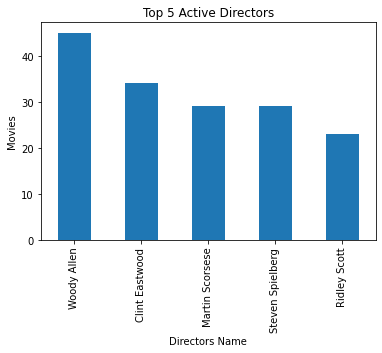

In [181]:
#display the most active directores in the dataset
top_dir = df_director.director.value_counts().nlargest(5)
top_dir.plot(kind = 'bar')
plt.title('Top 5 Active Directors')
plt.xlabel('Directors Name')
plt.ylabel('Movies')

Text(0, 0.5, 'Aaverage Budget')

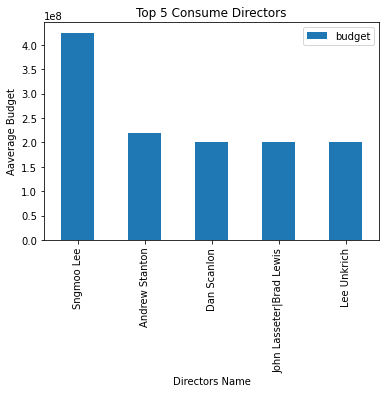

In [182]:
#get the top directors their consume higher bud on their movies
dir_bud = df_director.groupby('director')[['budget']].mean()
dir_bud.nlargest(5, 'budget').plot(kind = 'bar')
plt.title('Top 5 Consume Directors')
plt.xlabel('Directors Name')
plt.ylabel('Aaverage Budget')

Text(0, 0.5, 'Average Revenue')

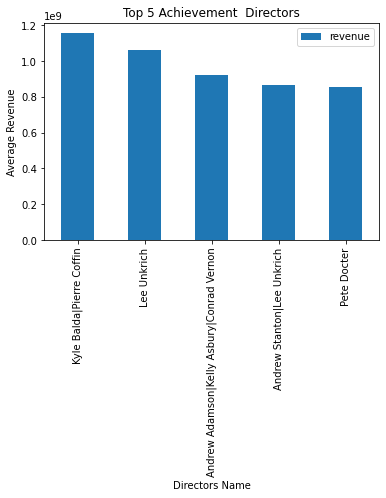

In [183]:
#get the top directors their achieve higher rev from their movies
dir_rev = df_director.groupby('director')[['revenue']].mean()
dir_rev.nlargest(5, 'revenue').plot(kind = 'bar')
plt.title('Top 5 Achievement  Directors')
plt.xlabel('Directors Name')
plt.ylabel('Average Revenue')

<a id='que3'></a>
## Release years

In this section, we will take a tour to get the answers to questions about the **Release Year** of movies.<br>
The section starts with selecting the related data needed to build a subset data frame related to the movie's release year. <br>Then, exploring the relationship between the release year and these data will lead to getting the answers. <br>Additionally, will represent visualizing some question's result in appropriate charts.

### Select the related data

In [184]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [185]:
df_year = df[['budget', 'revenue', 'original_title','vote_average', 'release_year']]

### Explore

In [186]:
df_year.head()

,budget,revenue,original_title,vote_average,release_year
0,150000000,1513528810,Jurassic World,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,7.1,2015
2,110000000,295238201,Insurgent,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,7.5,2015
4,190000000,1506249360,Furious 7,7.3,2015


In [187]:
df_year.isnull().sum()

budget            0
revenue           0
original_title    0
vote_average      0
release_year      0
dtype: int64

In [188]:
df_year.release_year.max(), df_year.release_year.min()

(2015, 1960)

In [189]:
df_year.describe()

,budget,revenue,vote_average,release_year
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,1.462429e+07,3.982690e+07,5.975012,2001.321859
std,3.091428e+07,1.170083e+08,0.935138,12.813260
min,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,5.400000,1995.000000
50%,0.000000e+00,0.000000e+00,6.000000,2006.000000
75%,1.500000e+07,2.400000e+07,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,9.200000,2015.000000


In [190]:
#best movie in each 10 years

### Visual ..

<AxesSubplot:ylabel='release_year'>

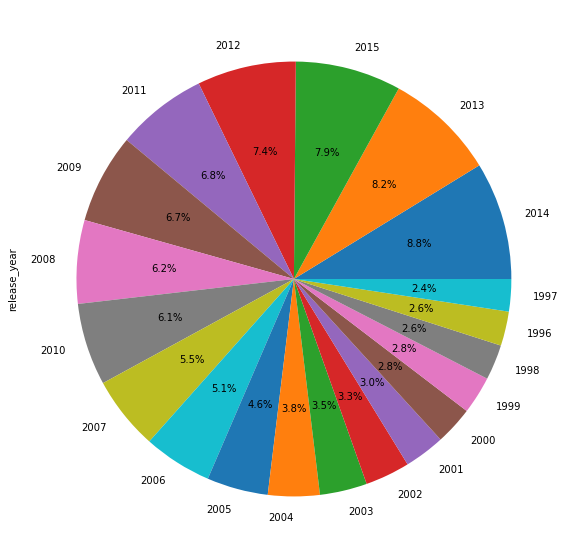

In [191]:
#lets check the year has most produced movies
year_prod = df_year.release_year.value_counts().nlargest(20)
year_prod.plot(kind = 'pie', autopct='%1.1f%%', figsize=(20, 10))

> In 2014, the higher movies production experienced!

Text(0, 0.5, 'Total Budget')

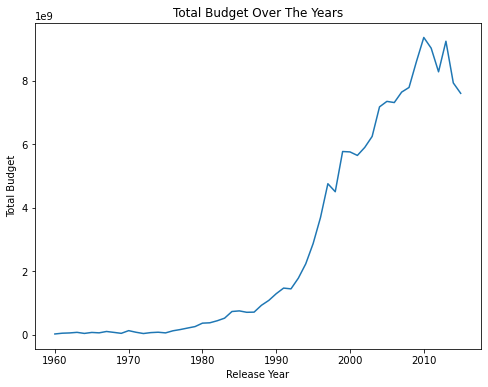

In [192]:
#plot with the most years spent budget , describe the trends
year_bud =df_year.groupby('release_year')['budget'].sum()
year_bud.plot(figsize=(8, 6))
plt.title('Total Budget Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Total Budget')

> Movies production costs are raising over years.. the years between 90th and 20th are experienced a remarkable raise! 
<br> The years after 2010 tend to reduce a costs littile..

Text(0, 0.5, 'Total Revenue')

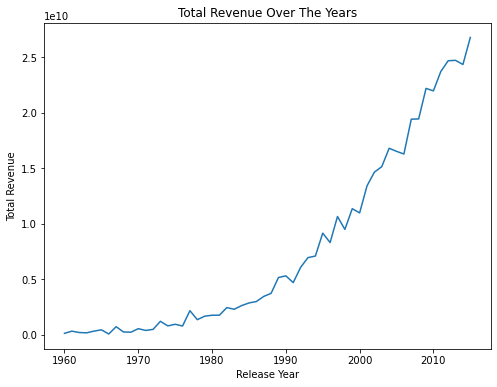

In [193]:
#plot with most year income, describe the trends
year_rev =df_year.groupby('release_year')['revenue'].sum()
year_rev.plot(figsize = (8,6))
plt.title('Total Revenue Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')

> The revenues of movies production are usually raising over the years. 
<br> In 1960-1970 the raise was slow, and in 1980 and after the growth was inflated..

Text(0, 0.5, 'Voting')

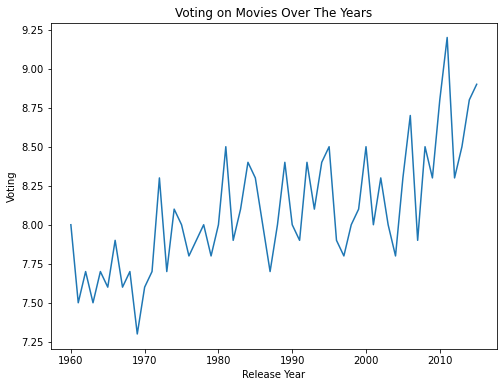

In [194]:
# movies scoring over the year
year_vote = df_year.groupby('release_year').vote_average.max()
year_vote.plot(figsize = (8,6))
plt.title('Voting on Movies Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Voting')

> In general, the movies tend to improvment and get the viwers satisfaction.. Especially after 2010

Text(0, 0.5, 'Total Profit')

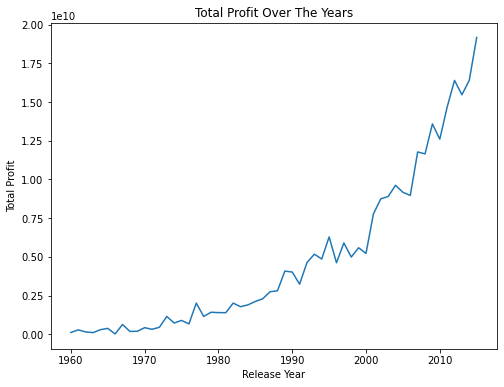

In [195]:
# what if we know how much the total revenue of movies production over the years (production market profits)
df_year = df_year.assign(profit = df_year.revenue - df_year.budget)
year_prof = df_year.groupby('release_year')['profit'].sum()
year_prof.plot(figsize = (8,6))
plt.title('Total Profit Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Total Profit')

> Production market profits.. Growth!

<a id='que4'></a>
## Production Companies 

In this section, we will take a tour to get the answers to questions about the **Production Companies** of movies.<br>
The section starts with selecting the related data needed to build a subset data frame related to the movie's production companies. <br>Then, exploring the relationship between the production company and these data will lead to getting the answers. <br>Additionally, will represent visualizing some question's result in appropriate chars.

### Select the related data

In [196]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [197]:
df_prod = df[['budget', 'revenue', 'original_title','production_companies','vote_average', 'release_year']]

### Explore

In [198]:
df_prod.head()

,budget,revenue,original_title,production_companies,vote_average,release_year
0,150000000,1513528810,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,110000000,295238201,Insurgent,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,190000000,1506249360,Furious 7,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [199]:
df_prod = df_prod.assign(production_companies=df['production_companies'].str.split('|')).explode('production_companies')

In [200]:
df_prod.head()

,budget,revenue,original_title,production_companies,vote_average,release_year
0,150000000,1513528810,Jurassic World,Universal Studios,6.5,2015
0,150000000,1513528810,Jurassic World,Amblin Entertainment,6.5,2015
0,150000000,1513528810,Jurassic World,Legendary Pictures,6.5,2015
0,150000000,1513528810,Jurassic World,Fuji Television Network,6.5,2015
0,150000000,1513528810,Jurassic World,Dentsu,6.5,2015


In [201]:
df_prod.isnull().sum()

budget                     0
revenue                    0
original_title             0
production_companies    1030
vote_average               0
release_year               0
dtype: int64

In [202]:
df_prod.dropna(subset =['production_companies'], inplace = True)

#check
df_prod.production_companies.isnull().sum()

0

In [203]:
#list with active production companies
df_prod.production_companies.value_counts()

Universal Pictures                                    522
Warner Bros.                                          509
Paramount Pictures                                    431
Twentieth Century Fox Film Corporation                282
Columbia Pictures                                     272
                                                     ... 
Silesia Film (coprodukcja)                              1
Kroyer Films                                            1
Sky Movies                                              1
WF/X                                                    1
Studio Babelsberg StudioBabelsberg Motion Pictures      1
Name: production_companies, Length: 7879, dtype: int64

> **'Universal Pictures'** the most company produced movies

In [204]:
prod_top = df_prod.query('production_companies == "Universal Pictures"')
#lets to know in which year begin produce
prod_top.release_year.min()

1962

In [205]:
#then, lets to know in which years has produced more movies 
prod_top.release_year.value_counts().nlargest(10)

1999    19
2006    18
2005    18
2011    17
2009    17
2002    16
2010    16
1992    16
2007    16
1996    15
Name: release_year, dtype: int64

> that appears the end of 90th and the beginning of the millennium are the peak years

In [206]:
#which movie its consumed more bud? 
prod_top.groupby(['original_title', 'release_year']).budget.max().sort_values(ascending = False)

original_title           release_year
Battleship               2012            209000000
King Kong                2005            207000000
Robin Hood               2010            200000000
Furious 7                2015            190000000
Evan Almighty            2007            175000000
                                           ...    
Curve                    2015                    0
Problem Child 2          1991                    0
Psycho III               1986                    0
Cry Freedom              1987                    0
*batteries not included  1987                    0
Name: budget, Length: 522, dtype: int64

In [207]:
#get the production copany
prod_top.query('original_title == "Battleship"') 

,budget,revenue,original_title,production_companies,vote_average,release_year
4405,209000000,303025485,Battleship,Universal Pictures,5.5,2012


In [208]:
#from which movie gains more?
prod_top.groupby(['original_title', 'release_year']).revenue.max().sort_values(ascending = False)

original_title                       release_year
Furious 7                            2015            1506249360
Minions                              2015            1156730962
Despicable Me 2                      2013             970761885
Jurassic Park                        1993             920100000
E.T. the Extra-Terrestrial           1982             792910554
                                                        ...    
That Touch of Mink                   1962                     0
The Andromeda Strain                 1971                     0
The Associate                        1996                     0
The Best Little Whorehouse in Texas  1982                     0
The Calcium Kid                      2004                     0
Name: revenue, Length: 522, dtype: int64

In [209]:
#get the production copany
prod_top.query('original_title == "Furious 7"') 

,budget,revenue,original_title,production_companies,vote_average,release_year
4,190000000,1506249360,Furious 7,Universal Pictures,7.3,2015


### Visual

Text(0, 0.5, 'Total Profit')

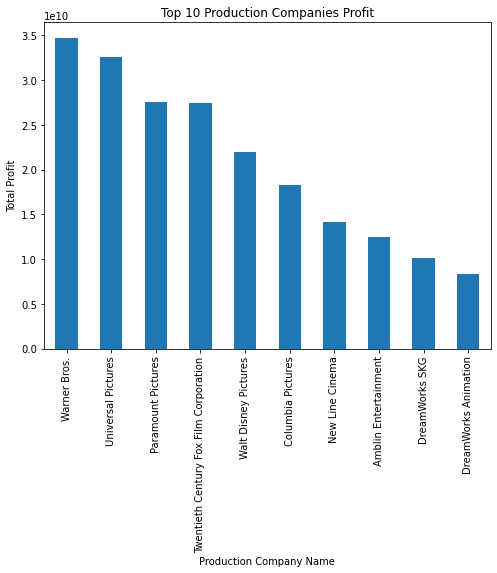

In [210]:
#top 10 production company profit!  
profit_prod = df_prod.groupby('production_companies')[['budget', 'revenue']].sum()
profit_prod = profit_prod.assign(profit = profit_prod.revenue - profit_prod.budget)
top_prod = profit_prod.profit.nlargest(10)
top_prod.plot(kind = 'bar', figsize=(8,6)), 
plt.title('Top 10 Production Companies Profit')
plt.xlabel('Production Company Name')
plt.ylabel('Total Profit')

> ok, we conclode to the higher profit of prodiction company not is the most producttion company of movies.<br>


<a id='conclusions'></a>
## Conclusion

**Here,** we reach the end of the project! let's review the main points and conclude the findings.<br>
in the beginning, we took an overview of the dataset to discover it and know how to deal with it. Then, we moved to the second part that is cleaning the general data such as dropping the duplicated rows and converting the datatype to what is appropriate with it. After that, we moved to analyze the dataset by selecting some variables and went deep to discover the relations between these variables and other aspects of data. <br><br>
The first variable chosen is **Genres**. That section displayed the top movie in each genres depending on voting, the highest ten genres movies that consumed the budget also that achieved the revenue. Also, it presented a list with best movie genres depending on the voting. **Documentary** genres got the best genres movie by 9.2/10. It has also been showing the produced movies based on genres which are **Drama** genres got the most production movies genres.<br><br>
The Second variable chosen is **Director**. That section displayed the numbers of directors contains in the dataset. Also, it presented who is the most director active between them which is **'Woody Allen'**, what the average voting on his movies and what the years of his work. It has also been showing a list with the top five active directors, the top five directors consumed the budget and a list with the top five directors achieved the revenue through their movies. <br><br>
The Third variable chosen is **Release Year** for movies. That section displayed the dataset was collected between **1960-2015** years. Also, it displayed the percentage of production movies over these years and showing the **2014** got a higher year that production of the movies. <br>
Then, it showing the total budget of movie production over the years.  It was noted the movies production budget is raising over the years. The years between **1990 - 2000** are experienced a remarkable raise! After that, it starts tends to a little reducing the budget in 2010 and after. <br>
Additionally,  it was showing the total revenue of movie production over the years. The revenues of movies production are raising over the years. In **1960-1970** the raise was slow, in 1980 and after, the growth was inflated. <br>
Also, it represented the voting on movies over the years. In general, the movies tend to improve and get the viewers satisfaction, **especially after 2010**. <br>
It also displayed the total movies production market profit that was inflated growing **in 1990** and after. <br><br>
The last variable chosen is **Production Companies**. That section begins with displayed the active movie's production companies and the numbers of the production of their movies. The **Universal Pictures** company got the higher company production produced the movies in the dataset. The result moved us to explore the company, it was begin produced the movies in 1962 and achieved a higher number of movies produced in 1999 by 19 movies in this year. It was noted that the end of 90th and the beginning of the millennium are the peak years of the company. The section also displayed a list with the top ten movies production companies profits and appeared the **Warner Bros.** got the higher profit and **Universal Pictures** achieved the second higher profit. It is worth noting that the **Warner Bros.** is the second most production company after the **Universal Pictures**. <br><br>

**Limitations** of the project: The **Homepage, tagline and keywords** variables are contained a lot of missing data which led to their exclusion from analyzing the dataset and discover the relation between them and the other variables.

In [211]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1